# **Univariate Analysis**

---

In this notebook, we will focus on doing a Univariate Analysis of our dataset.

Univariate Analysis is a statistical technique that is used to examine the distribution and characteristics of a **single variable in isolation**, without considering the relationships between variables.

It involves summarizing and visualizing the distribution of a single variable using descriptive statistics such as measures of central tendency (e.g., mean, median, mode) and measures of variability (e.g., range, variance, standard deviation). For visualizing the statistical information, we will use graphical methods such as histograms and box plots.

This step is very important because it provides a basic understanding of the data and helps identify any patterns, trends, or outliers in the data.

In this EDA, as we mention in the begining of the project, the goal is detail, so to achieve that we will conduct a thorough analysis of each variable in the dataset.

**Steps**

For each variable, we will analize:

- Statistical information using the `describe()` method (categorical and numerical variables);

- The distribution of the data using histograms (numerical variables);

- The skewness of the data using the `skew()` method (numerical variables);

- The kurtosis of the data. using the `kurt()` metho (numerical variables).

Before we can begin, let's import our libraries and get our clean CSV.

In [3]:
# Importing libraries needed for the second step of the project:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib.pyplot import MaxNLocator, FuncFormatter
from matplotlib.font_manager import FontProperties

# Setting seaborn plot parameters:
sns.set_theme(context='notebook', style='darkgrid')

# Filtering out warnings:
warnings.filterwarnings('ignore')

# Setting pandas dataframe visualization parameters:
pd.set_option('display.max_columns', 100)

print('Packages collected!')

Packages collected!


In [4]:
# Collecting data from previous step:
pirated_films = pd.read_csv('data/pirated_films.csv', sep=',')

pirated_films.head()

,movie_title,film_director,industry,available_langs,run_time_min,imdb_user_rating,worldwide_release,platform_post_date,days_to_piracy,avg_views_per_download,avg_downloads_per_day,downloads,total_views
0,Little Dixie,John Swab,Hollywood / English,English,105,4.8,2023-01-28,2023-02-20,23,9.190789,13.217391,304,2794
1,Grilling Season: A Curious Caterer Mystery,Paul Ziller,Hollywood / English,English,84,6.4,2023-02-05,2023-02-20,15,13.726027,4.866667,73,1002
2,In the Earth,Ben Wheatley,Hollywood / English,"English,Hindi",107,5.2,2021-06-18,2021-04-20,-59,10.104415,24.186441,1427,14419
3,Vaathi,Venky Atluri,Tollywood,Hindi,139,8.1,2023-02-17,2023-02-20,3,3.149128,516.333333,1549,4878
4,Alone,Shaji Kailas,Tollywood,Hindi,122,4.6,2023-01-26,2023-02-20,25,3.710807,26.280000,657,2438


## **_Univariate Analysis: `movie_title`_**

### **Statistical View**

In [5]:
# Checking statistics:
pirated_films['movie_title'].describe()

count                                             20547
unique                                            16572
top       The Girl Who Escaped: The Kara Robinson Story
freq                                                402
Name: movie_title, dtype: object

With the describe method, we can have a first look at the `movie_title` variable and see some statistical information:

- Of the 20.547 entries in the dataset, we have **16.572** unique movie titles and 3.975 entries that contains the same movie title;

- The data point that is most occuring in this variable, is the movie title for **_The Girl Who Escaped: The Kara Robinson Story_**, showing up 402 times in the dataset.

We can check all of these registries containg the same movie title to see what is the reason for that happening:

In [6]:
# Checking reocurring movie title:
pirated_films.query('movie_title == "The Girl Who Escaped: The Kara Robinson Story"').head(10)

,movie_title,film_director,industry,available_langs,run_time_min,imdb_user_rating,worldwide_release,platform_post_date,days_to_piracy,avg_views_per_download,avg_downloads_per_day,downloads,total_views
28,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,9.776316,190.0,760,7430
40,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,9.777632,190.0,760,7431
84,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,9.778947,190.0,760,7432
128,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,9.780263,190.0,760,7433
171,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,9.781579,190.0,760,7434
215,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,9.784211,190.0,760,7436
259,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,9.785526,190.0,760,7437
303,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,9.786842,190.0,760,7438
347,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,9.789474,190.0,760,7440
391,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,9.790789,190.0,760,7441


In [7]:
# Checking the last entries for this film:
pirated_films.query('movie_title == "The Girl Who Escaped: The Kara Robinson Story"').tail(10)

,movie_title,film_director,industry,available_langs,run_time_min,imdb_user_rating,worldwide_release,platform_post_date,days_to_piracy,avg_views_per_download,avg_downloads_per_day,downloads,total_views
17239,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,10.287206,191.50,766,7880
17283,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,10.288512,191.50,766,7881
17327,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,10.292428,191.50,766,7884
17371,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,10.297650,191.50,766,7888
17415,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,10.298956,191.50,766,7889
17459,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,10.300261,191.50,766,7890
17503,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,10.293351,191.75,767,7895
17547,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,10.295958,191.75,767,7897
17591,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,10.297262,191.75,767,7898
17635,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,10.298566,191.75,767,7899


After checking the first and last 10 entries for this movie title, it appears that each time the movie received a new view (sometimes after receiving a few more views, such as 5 or 3), a new entry was registered in the database. 

This is not ideal, as it will affect all subsequent analyses. We have identified that this is due to a new record being created in the database for each new view. Therefore, we will drop all entries except the last one, which contains the most recent number of total views. This will allow us to continue the analysis using this film and ensure that we are utilizing the most recent data for this record.

As we know the latest record of this film contains 7.899 views, we can use this information to drop all other rows except this one.

In [8]:
# Defining rows to drop:
rows_to_drop = pirated_films.query('movie_title == "The Girl Who Escaped: The Kara Robinson Story" & total_views != 7899')

# Dropping:
pirated_films = pirated_films.drop(rows_to_drop.index)

In [9]:
# Checking entries for this film:
pirated_films.query('movie_title == "The Girl Who Escaped: The Kara Robinson Story"')

,movie_title,film_director,industry,available_langs,run_time_min,imdb_user_rating,worldwide_release,platform_post_date,days_to_piracy,avg_views_per_download,avg_downloads_per_day,downloads,total_views
17635,The Girl Who Escaped: The Kara Robinson Story,Simone Stock,Hollywood / English,English,88,6.6,2023-02-11,2023-02-15,4,10.298566,191.75,767,7899


Let's check the statistics again.

In [10]:
# Checking statistics:
pirated_films['movie_title'].describe()

count      20146
unique     16572
top       Vaathi
freq         402
Name: movie_title, dtype: object

We can see that we have the same situation happening again, where the same movie is present multiple times in the dataset only changing the number of views. Lets identify all movie titles that show up in our dataset more than 1 time:

In [11]:
# group the data by movie_title and count the number of occurrences
grouped = (pirated_films
           .groupby('movie_title')
           .size()
           .sort_values(ascending=False))

# Creating a new dataframe with the movie_title counts:
df = pd.DataFrame({'movie_title': grouped.index, 
                   'count': grouped.values})

In [12]:
# Checking:
df.query('count > 1')

,movie_title,count
0,Who Invited Charlie?,402
1,Vaathi,402
2,Consent,202
3,WWE Smackdown 2023-02-10,202
4,Vacation Home Nightmare,202
...,...,...
539,Trishna,2
540,Wonder Woman,2
541,Premature,2
542,Enemy,2


We have 544 titles that show up more than one time in the dataset, considering that some movies contain the same name but are diferent, let's only worry about about the clear ouliers in this case, mainly the movies that show up hundreds of times.

In [13]:
# Checking movies that show up more than 50 times:
df.query('count > 50')

,movie_title,count
0,Who Invited Charlie?,402
1,Vaathi,402
2,Consent,202
3,WWE Smackdown 2023-02-10,202
4,Vacation Home Nightmare,202
5,Little Dixie,202
6,The Inspection,202
7,Marlowe,201
8,Baby Ruby,201
9,Shehzada,201


For all of these titles, we have to do the same procedure as before, excluding all entries except the last one that contains the most updated number of total_views. Luckily there is a pattern that can be easily observed with all this unecessary entries:

- All variables contain the same values (are duplicates), except the last 4 variables (`avg_views_per_download`, `avg_downloads_per_day`, `downloads`, `total_views`) that change because each entry adds one or more to the `total_views` variable, wich influences all other 3 variables.

Because of this pattern, we can drop all rows were the variables are duplicates and only the last 4 ones change. Basically the same procedure we did above for the ***The Girl Who Escaped: The Kara Robinson Story*** movie, but this time for all of the movie titles that we identified in the list above showing up more than 50 times in the dataset.

In [14]:
# Sorting dataset by the total_views:
pirated_films = pirated_films.sort_values(by=['total_views'], ascending=False)

# Dropping duplicates:
pirated_films = pirated_films.drop_duplicates(subset=pirated_films.columns[:-4], keep='first')

Here we've done the following:

- Sorted our dataset by the `total_views` column in Descending order (highest to lowest).

- We dropped all entries that contains the same values for all columns except the last 4, we drop all rows and keep only the first that contains the most recent total_views value (the highest, since we sorted the dateset in Descending order).

Let's check the shape of the dataset again.

In [15]:
# Checking new shape:
pirated_films.shape

(17084, 13)

We can see that those 3K+ entries we've identified as being duplicated on the dataset in the begining of this section using the describe method, were composed by these unecessary entries, with that, we only should have a couple more unecessary entries in the dataset. Let's do the same check as we did before, were we group the dataset and search for duplicate movie names.

In [16]:
# group the data by movie_title and count the number of occurrences
grouped = pirated_films.groupby('movie_title').size().sort_values(ascending=False)

# Creating a new dataframe with the movie_title counts:
df = pd.DataFrame({'movie_title': grouped.index, 'count': grouped.values})

df.query('count > 1')

,movie_title,count
0,True Justice,5
1,Alone,5
2,Pinocchio,5
3,Sacrifice,5
4,Don,4
...,...,...
444,Sundown,2
445,Mercenaries,2
446,Dreamland,2
447,Love Story,2


Now we only have up to 5 movie entries that contains the same movie name showing up in the dataset. As this number is very low, the impact on the analysis shouldn't be big, so we will keep the rest of these values in the dataset. 

With this analysis, we observed:

- The way some of the movie titles were inserted on the dataset was not ideal, having a new entry just to account for a new visualization on the piracy website;

- Other movies had the data collected correctly, having only one entry in the dataset containg the most up to date number of views.

This shows the importance of an Univariate Analysis of all variables of our dataset, with it we can describe our data and also find necessary changes and corrections not found in the cleaning phase, in this case, the presence of multiple duplicate entries changing only on the number of views.

As this is a categorical variable and we are doing a Univariate Analysis, we don't have many further possibilities of analysis, so let's check the next variable in our dataset.

## **_Univariate Analysis: `film_director`_**

### **Statistical View**

In [17]:
# Using the describe method:
pirated_films['film_director'].describe()

count            17084
unique            9673
top       Not Assigned
freq              1565
Name: film_director, dtype: object

With the `describe` method, we can gatter some information about this variable:

- Of the total 17.084 entries in the dataset, **9.673 of them are unique film directors**, **1.565 of them don't have a director** assigned to them and **5.846** of entries are from duplicate directors;

- The most frequent value of this variable is **Not Assigned**. That means that the majority of films in the dataset don't contain a film director assigned to it. This value shows up in **1.565** entries

In [26]:
# Creating variable:
no_director = pirated_films.query('film_director == "Not Assigned"')

In [27]:
# Checking some of the "Not Assigned" values:
no_director.head(10)

,movie_title,film_director,industry,available_langs,run_time_min,imdb_user_rating,worldwide_release,platform_post_date,days_to_piracy,avg_views_per_download,avg_downloads_per_day,downloads,total_views
8891,M.A. Pass,Not Assigned,Bollywood / Indian,English,100,5.8,1970-01-01,2018-03-30,17620,4.958325,2.098581,36977,183344
11384,Chudail Story,Not Assigned,Bollywood / Indian,Hindi,100,5.8,1970-01-01,2016-07-22,17004,3.343878,3.087920,52507,175577
11896,Bezubaan Ishq,Not Assigned,Bollywood / Indian,Hindi,100,4.0,2015-07-03,2015-07-15,12,5.581456,2566.833333,30802,171920
9049,Maatr,Not Assigned,Bollywood / Indian,Hindi,113,4.5,2017-04-21,2017-04-29,8,4.215058,4418.000000,35344,148977
8501,Jaguar,Not Assigned,Tollywood,"Kannada,Telugu",153,5.3,2016-10-06,2018-06-25,627,5.692634,41.355662,25930,147610
9518,Saat Uchakkey,Not Assigned,Bollywood / Indian,Hindi,139,5.7,2016-10-14,2016-10-17,3,3.370741,13511.666667,40535,136633
17147,Chhota Bheem And The Curse Of Damyaan,Not Assigned,Anime / Kids,English,100,5.8,2012-12-11,2012-12-12,1,1.997491,60973.000000,60973,121793
12202,Ishqedarriyaan,Not Assigned,Bollywood / Indian,Hindi,100,4.8,2015-05-15,2015-06-05,21,3.406026,1686.380952,35414,120621
10261,Running Shaadi,Not Assigned,Bollywood / Indian,Hindi,114,6.6,2017-02-24,2017-02-25,1,4.200509,28298.000000,28298,118866
15552,Chota Bheem In Jungli Kabeela,Not Assigned,Anime / Kids,Hindi,100,5.8,2014-01-25,2014-01-28,3,2.049141,18708.000000,56124,115006


In [28]:
# Checking last 10 values:
no_director.tail(10)

,movie_title,film_director,industry,available_langs,run_time_min,imdb_user_rating,worldwide_release,platform_post_date,days_to_piracy,avg_views_per_download,avg_downloads_per_day,downloads,total_views
247,TNA.Impact 2023-01-12,Not Assigned,Wrestling,English,100,5.8,2023-01-12,2023-01-13,1,3.958801,267.0,267,1057
204,TNA.Impact 2023-01-19,Not Assigned,Wrestling,English,100,5.8,2023-01-19,2023-01-20,1,4.432432,222.0,222,984
489,TNA.Impact 2022-12-01,Not Assigned,Wrestling,English,100,5.8,2022-12-01,2022-12-02,1,4.544186,215.0,215,977
578,TNA.Impact 2022-11-17,Not Assigned,Wrestling,English,100,5.8,2022-11-17,2022-11-18,1,4.086207,232.0,232,948
535,TNA.Impact 2022-11-24,Not Assigned,Wrestling,English,100,5.8,2022-11-24,2022-11-25,1,4.441748,206.0,206,915
112,TNA.Impact 2023-02-02,Not Assigned,Wrestling,English,100,5.8,2023-02-02,2023-02-03,1,5.089888,178.0,178,906
452,TNA.Impact 2022-12-08,Not Assigned,Wrestling,English,100,5.8,2022-12-08,2022-12-09,1,4.625000,192.0,192,888
682,TNA.Impact 2022-11-03,Not Assigned,Wrestling,English,100,5.8,2022-11-03,2022-11-04,1,4.300493,203.0,203,873
628,TNA.Impact 2022-11-10,Not Assigned,Wrestling,English,100,5.8,2022-11-10,2022-11-11,1,4.369231,195.0,195,852
18,TNA.Impact 2023-02-16,Not Assigned,Wrestling,English,100,5.8,2023-02-16,2023-02-17,1,3.900585,171.0,171,667


With this check:

- It appears that all (or at least some of the values) Wrestling programs have no director assigned to them.

Let's do a check to see exactly wich are the industries with the most amount of film director that were not assigned.

In [32]:
# Checking the industries with the higher number of "Not Assigned" film director values:
no_dir_total = no_director['industry'].value_counts()

no_dir_total

Hollywood / English    939
Anime / Kids           184
Bollywood / Indian     154
Stage shows            121
Wrestling               69
Punjabi                 35
Pakistani               30
Tollywood               28
Dub / Dual Audio         5
Name: industry, dtype: int64

Considering the gross amounts for the "no director" dataset, the industry with more entries with no director assigned to it is **Hollywood/English**. To check the proportion of these values compared to the dataset as a hole, let's check the amount of industries present in the entire dataset:

In [33]:
# Counting the total industries of the dataset:
total_set = pirated_films['industry'].value_counts()

total_set

Hollywood / English    12196
Bollywood / Indian      2420
Anime / Kids            1028
Tollywood                769
Punjabi                  331
Stage shows              124
Pakistani                 92
Wrestling                 78
Dub / Dual Audio          45
3D Movies                  1
Name: industry, dtype: int64

To find the ratio of how many records do not have a director to the total data for each industry, let's divide the total records without a director by the total number of records per industry in the dataset:

In [60]:
# Calculating the % of films with no director:
percentage_no_dir = round((no_dir_total / total_set) * 100, 2)

# Displaying results:
print('Percentage of Movies Without Directors by Industry:')
print('='*52)
print('Industry               Percentage of Total')
percentage_no_dir.sort_values(ascending=False)

Percentage of Movies Without Directors by Industry:
Industry               Percentage of Total


Stage shows            97.58
Wrestling              88.46
Pakistani              32.61
Anime / Kids           17.90
Dub / Dual Audio       11.11
Punjabi                10.57
Hollywood / English     7.70
Bollywood / Indian      6.36
Tollywood               3.64
3D Movies                NaN
Name: industry, dtype: float64

We can see that:

- **97.6%** of all entries of the `Stage Shows` industry doesn't have a director assigned to it;

- The `Wrestling` industry comes in second with **88.5%** of records without a director assigned to it;

- The `Hollywood/English` has the most entries without a director considering the pure count of this metric (beacuse it is the most prevalent industry in the dataset). But, proportionally, it has only **7.7%** of it's values without a director.

We can also check wich director shows up the most, considering the entries with a director:

In [67]:
# Checking the most frequent director:
director_projects = pirated_films.query('film_director != "Not Assigned"')['film_director'].value_counts().head(10)

director_projects

David Dhawan         32
Ram Gopal Varma      27
Vikram Bhatt         25
Steven Spielberg     24
Priyadarshan         22
Puri Jagannadh       17
Steven Soderbergh    16
Mahesh Bhatt         16
Tyler Perry          15
Yash Chopra          15
Name: film_director, dtype: int64

We can see that, out of the entries with a director assigned to them, **David Dhawan** is the most frequent of them all, accounting for **32** unique projects in the dataset. This indicates the high number of unique directors in the dataset. Let's plot this data for better visualization of the top 10 directors:

In [68]:
# Creating a new dataframe with the director counts:
director_count = pd.DataFrame({'director':director_projects.index,
                               'num_projects': director_projects.values})

director_count

,director,num_projects
0,David Dhawan,32
1,Ram Gopal Varma,27
2,Vikram Bhatt,25
3,Steven Spielberg,24
4,Priyadarshan,22
5,Puri Jagannadh,17
6,Steven Soderbergh,16
7,Mahesh Bhatt,16
8,Tyler Perry,15
9,Yash Chopra,15


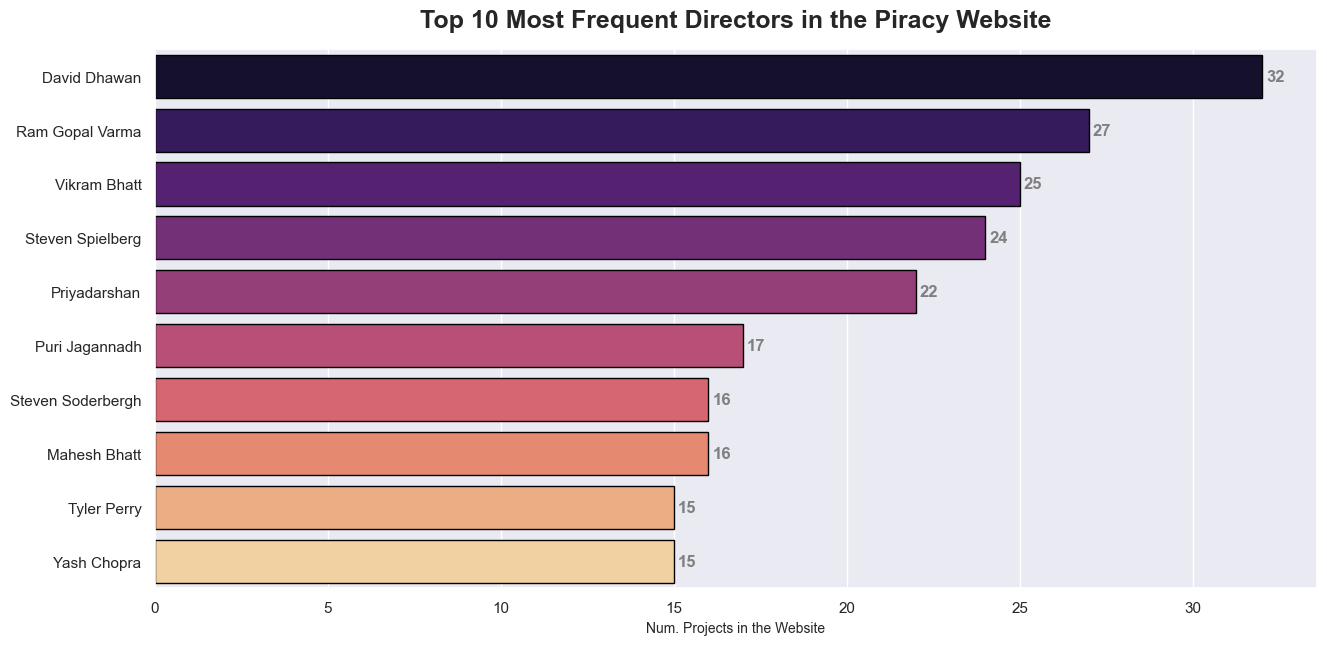

In [110]:
# Setting figure size:
fig, ax = plt.subplots(figsize=(15, 7))

# Creating barplot:
ax = sns.barplot(data=director_count,
                 x='num_projects',
                 y='director',
                 edgecolor='black',
                 palette='magma')

# Setting title and labels:
plt.title('Top 10 Most Frequent Directors in the Piracy Website',
          fontdict={'size': 18, 'weight': 'bold'}, pad=16)

plt.xlabel('Num. Projects in the Website', 
           fontdict={'size': 10})

plt.ylabel('')

# Forcing y axis to start at 0:
ax.set_xlim(xmin=0)

# Setting loop to display values at the top of the bars:
for (labels) in ax.containers:
    ax.bar_label(labels, padding=3, color='gray', fontweight='bold')

plt.show()

**Conclusion**

Analyzing this variable, we reach some conclusions:

- Out of the total 17.084 entries in the dataset:

    - **9.673 of them are unique film directors**, representing **56.5%** of the total values;

    - **1.565 of them don't have a director** assigned to them, this is the most frequent value of this variable, representing **9%** of the total entries in the dataset.
    
    - **5.846** of entries are from duplicate directors, representing **34.1%** of the total values;

- Out of the records with a director assigned to them, them director with the highest number of appearances in the dataset is **David Dhawan** with 32 unique projects in the data;

- Proportionally, the `Stage Shows` industry has the most entries without a director, around **97.6%** of total values of this industry;

- Considering only gross amounts, the `Hollywood/English` industry has the most entries without a director, but that is explained by this industry being the one with the most amout of entries in the dataset, 12.196 values or **71.4%** of the total dataset.

## **_Univariate Analysis: `industry`_**

### **Statistical View**

In [61]:
# Describe method:
pirated_films['industry'].describe()

count                   17084
unique                     10
top       Hollywood / English
freq                    12196
Name: industry, dtype: object

We can see that:

- We have **10 unique** industries that compose the dataset;

- The industry with the highest number of entries in the dataset is the `Hollywood/English` industry, appearing in **12.196** entries or 71.4% of values.

Let's check the other industries:

In [64]:
# Checking other industries:
industries = pirated_films['industry'].value_counts()

industries

Hollywood / English    12196
Bollywood / Indian      2420
Anime / Kids            1028
Tollywood                769
Punjabi                  331
Stage shows              124
Pakistani                 92
Wrestling                 78
Dub / Dual Audio          45
3D Movies                  1
Name: industry, dtype: int64

In [112]:
# Checking percentages of total entries:
industry_pct = round((industries/pirated_films.shape[0]) * 100, 2)

industry_pct

Hollywood / English    71.39
Bollywood / Indian     14.17
Anime / Kids            6.02
Tollywood               4.50
Punjabi                 1.94
Stage shows             0.73
Pakistani               0.54
Wrestling               0.46
Dub / Dual Audio        0.26
3D Movies               0.01
Name: industry, dtype: float64

To better visualize the proportions between each industry dominance in the dataset, let's create a dataframe with this data and plot it:

In [113]:
# Creating dataframe:
industry_count = pd.DataFrame({'industry': industry_pct.index,
                               'percentage': industry_pct.values})

industry_count

,industry,percentage
0,Hollywood / English,71.39
1,Bollywood / Indian,14.17
2,Anime / Kids,6.02
3,Tollywood,4.50
4,Punjabi,1.94
5,Stage shows,0.73
6,Pakistani,0.54
7,Wrestling,0.46
8,Dub / Dual Audio,0.26
9,3D Movies,0.01


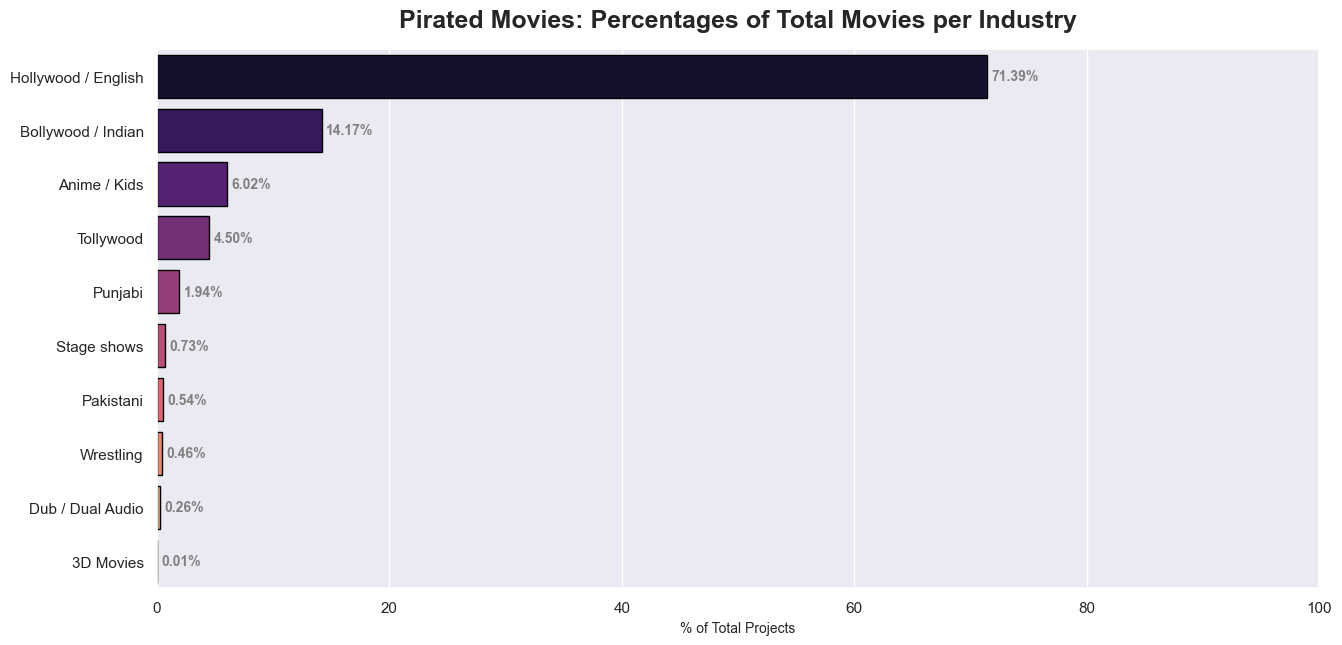

In [135]:
# Setting figure size:
fig, ax = plt.subplots(figsize=(15, 7))

# Creating barplot:
ax = sns.barplot(data=industry_count,
                 x='percentage',
                 y='industry',
                 edgecolor='black',
                 palette='magma')

# Setting title and labels:
plt.title('Pirated Movies: Percentages of Total Movies per Industry',
          fontdict={'size': 18, 'weight': 'bold'}, pad=16)

plt.xlabel('% of Total Projects', 
           fontdict={'size': 10})

plt.ylabel('')

# Forcing y axis to start at 0:
ax.set_xlim(xmin=0, xmax=100)

# Setting loop to display values at the top of the bars:
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, color='gray', 
                 fontweight='bold', fontsize=10,
                 labels=[f'{x:.2f}%' for x in container.datavalues])

plt.show()

We can conclude:

- The dataset has **10 unique** industries;

- The industry with the highest number of entries in the dataset is the `Hollywood/English` industry, appearing in **12.196** entries or 71.4% of values;

- The `Hollywood/English` and `Bollywood/Indian` industries togheter compose **85.5%** of the total dataset;

- All other industries combined make up the remaining **14.5%** of values.